<h1> Checkpoint:</h1>

**Looking to see completetion and effort in completing the checkpoint. It's okay if it's not correct**

Based off this dataset with school financial, enrollment, and achievement data, we are interested in what information is a useful indicator of student performance at the state level.

This question is a bit too big for a checkpoint, however. Instead, we want you to look at smaller questions related to our overall goal. Here's the overview:

1. Choose a specific test to focus on
>Math/Reading for 4/8 grade
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create 2 well-labeled visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Pick if you want to do a regression or classification task. For both cases, defined _exactly_ what you want to predict, and pick any model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a> and <a href="https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html">classifiers</a>).
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

** Include comments throughout your code! Every cleanup and preprocessing task should be documented.


Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

<h2> Data Cleanup </h2>

Import numpy, pandas, matplotlib, and seaborn

(Feel free to import other libraries!)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [3]:
df = pd.read_csv('../data/states_edu.csv')
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


You should always familiarize yourself with what each column in the dataframe represents. \ Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [4]:
df.rename({
    'GRADES_PK_G':'ENROLL_PREK',
    'GRADES_KG_G':'ENROLL_KINDER',
    'GRADES_4_G':'ENROLL_4',
    'GRADES_8_G':'ENROLL_8',
    'GRADES_12_G':'ENROLL_12',
    'GRADES_1_8_G':'ENROLL_PRIMARY',
    'GRADES_9_12_G':'ENROLL_HS',
    'GRADES_ALL_G':'ENROLL_ALL',
    'ENROLL':'ENROLL_ALL_EST'
    },
    axis=1,inplace=True)
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL_ALL_EST,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,ENROLL_4,ENROLL_8,ENROLL_12,ENROLL_PRIMARY,ENROLL_HS,ENROLL_ALL,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


<h2>Exploratory Data Analysis (EDA) </h2>

Chosen Predictor for Test: **<Math/Reading for 4/8 grade>**   (Ex. Math for 8th grade)

Reading for 8th grade

Predictor Score in the questions refers to the predictor variable you chose here.

How many different years of data are in our dataset? Use a pandas function.

In [5]:
df["AVG_READING_8_SCORE"].notna().sum()

562

Let's compare Michigan to Ohio. Which state has the higher average predictor score across all years? OHIO

In [6]:
print( df[df["STATE"] == "OHIO"].AVG_READING_8_SCORE.mean())
print( df[df["STATE"] == "MICHIGAN"].AVG_READING_8_SCORE.mean())

267.7
263.5


Find the average for your pedictor score across all states in 2019

In [7]:
df[df["YEAR"] == 2019].AVG_READING_8_SCORE.mean()

262.5660377358491

Find the maximum predictor score for every state. Hint: there's a function that allows you to do this easily

In [8]:
i = df.groupby("STATE")["AVG_READING_8_SCORE"].max()
i


STATE
ALABAMA                 259.0
ALASKA                  261.0
ARIZONA                 263.0
ARKANSAS                262.0
CALIFORNIA              263.0
COLORADO                271.0
CONNECTICUT             275.0
DELAWARE                267.0
DISTRICT_OF_COLUMBIA    250.0
DODEA                   280.0
FLORIDA                 267.0
GEORGIA                 266.0
HAWAII                  261.0
IDAHO                   270.0
ILLINOIS                267.0
INDIANA                 272.0
IOWA                    269.0
KANSAS                  269.0
KENTUCKY                270.0
LOUISIANA               257.0
MAINE                   271.0
MARYLAND                274.0
MASSACHUSETTS           278.0
MICHIGAN                266.0
MINNESOTA               271.0
MISSISSIPPI             256.0
MISSOURI                268.0
MONTANA                 273.0
NATIONAL                268.0
NEBRASKA                270.0
NEVADA                  262.0
NEW_HAMPSHIRE           275.0
NEW_JERSEY              276.0
NEW_

<h2> Feature Selection </h2>

After exploring the data, you now have to choose features that you would use to predict the performance of the students on a chosen test (your chosen predictor). By the way, you can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features

In [13]:


df["SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT"] = df["SUPPORT_SERVICES_EXPENDITURE"] / df["ENROLL_ALL"]
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL_ALL_EST,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,ENROLL_12,ENROLL_PRIMARY,ENROLL_HS,ENROLL_ALL,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE,INSTRUCTION_EXPENDITURE_PER_STUDENT,SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN,2.025197,1.004650
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN,4.068693,2.864810
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN,2.132082,1.496312
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN,2.184247,1.095128
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN,2.732512,1.621537


Final feature list: instructionsal expense per student and support expense for student 

Feature selection justification: I chose these because how much money you spend on support and instruction could impact the reading scores


<h2>Visualization</h2>

Use any graph you wish to see the relationship of your chosen predictor with any features you chose

**Visualization 1**

Text(0, 0.5, 'Instruction spending per student')

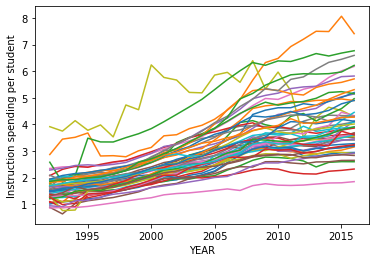

In [14]:
df.set_index('YEAR').groupby('STATE').SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT.plot()
plt.ylabel('Instruction spending per student')


Shows the spending on suport per student over the years and each line is a state

**Visualization 2**

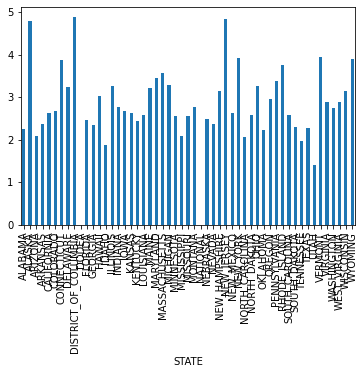

In [20]:
df.groupby('STATE').SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT.mean().plot.bar()

shows the average spending per student on support services (idk how make it look better)

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [24]:
from sklearn.model_selection import train_test_split

In [68]:
df.dropna(subset=['AVG_READING_8_SCORE'], inplace=True)
X = df[['ENROLL_8','SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT','YEAR']].dropna()
y = df.loc[X.index]['AVG_READING_8_SCORE']
X.dtypes

ENROLL_8                                    float64
SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT    float64
YEAR                                          int64
dtype: object

In [69]:
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=.3, random_state=1)

<h2> Prediction </h2>

ML Models Resource: https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a

Chosen ML task: **<REGRESSION**

In [70]:
# import your sklearn class here
from sklearn.linear_model import LinearRegression

In [71]:
# create your model here
model = LinearRegression()

In [72]:
model.fit(X_train, y_train)

LinearRegression()

In [73]:
y_pred = model.predict(X_test)


In [ ]:
# FOR CLASSIFICATION ONLY:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(model, X_test, y_test,
                         cmap=plt.cm.Blues)

-263.6690621602127
[-8.68456510e-06  3.19620376e-01  2.62209461e-01]
0.0910168783903127
5.9000100032454155


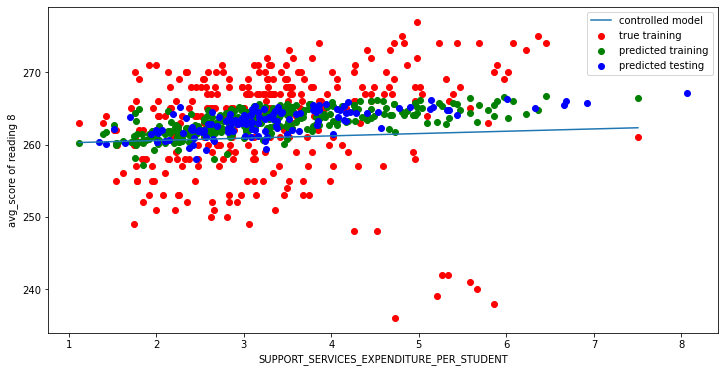

In [76]:
# FOR REGRESSION ONLY: (pick a single column to visualize results)

# Results from this graph _should not_ be used as a part of your results -- it is just here to help with intuition. 
# Instead, look at the error values and individual intercepts.


col_name = "SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT"
col_index = X_train.columns.get_loc(col_name)

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")
plt.scatter(X_test[col_name], model.predict(X_test), color = "blue")

new_x = np.linspace(X_train[col_name].min(),X_train[col_name].max(),200)
intercept = model.predict([X_train.sort_values(col_name).iloc[0]]) - X_train[col_name].min()*model.coef_[col_index]
plt.plot(new_x, intercept+new_x*model.coef_[col_index])

plt.legend(['controlled model','true training','predicted training','predicted testing'])
plt.xlabel(col_name)
plt.ylabel("avg_score of reading 8")
print(model.intercept_)
print(model.coef_)
print(model.score(X_test, y_test))
print(np.mean((model.predict(X_test)-y_test)**2)**0.5)

<h2> Summary </h2>

Based on this data and the anaylis I did on it, I found that the amount of people enrolled in 8th grade negetively impacted the avergage reading score for 8th graders. However both the amount of spending on support per person and the year positivly effected the score of avergage reading score for 8th graders. Also based on the coeficients it looks like the amount of people enrolled had the biggest impact of the 3 on the scores.